<a href="https://colab.research.google.com/github/Gobihanath/DTect/blob/main/Extraction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


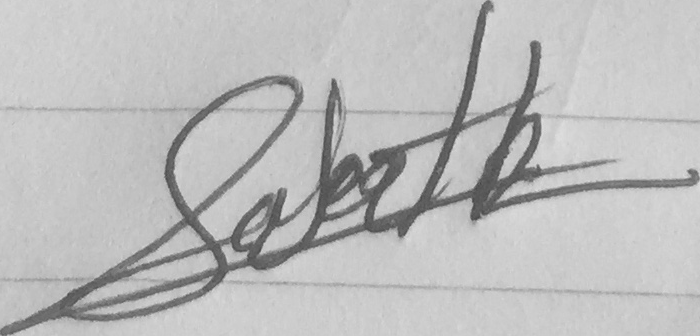

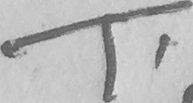

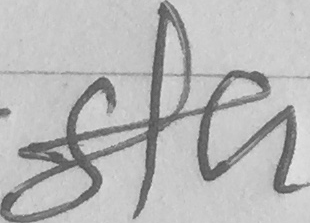

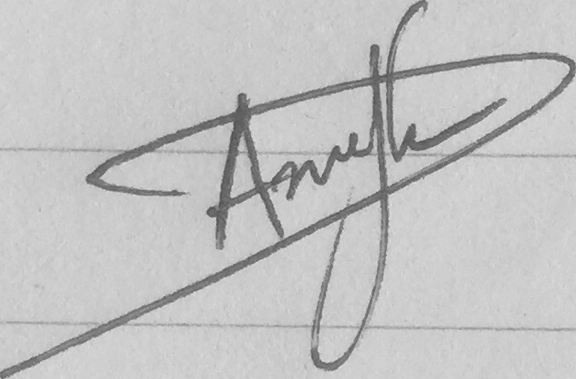

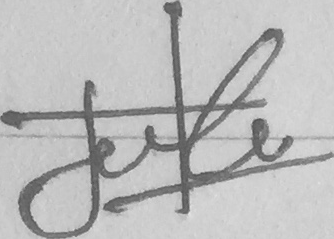

In [10]:
import cv2
import numpy as np
from google.colab import drive
import os
from google.colab.patches import cv2_imshow

# Mount Google Drive
drive.mount('/content/drive')

# Load image in grayscale
image_path = '/content/drive/MyDrive/IMG_6949.JPG'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert grayscale to HSV-like format (H, S, and V are the same)
hsv = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Define lower and upper boundaries for the HSV channels
lower = np.array([90, 38, 0], dtype=np.uint8)
upper = np.array([145, 255, 255], dtype=np.uint8)

# Create a mask using inRange on the HSV-like image
mask = cv2.inRange(hsv, lower, upper)

# Find contours on the extracted mask with hierarchy
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Set a minimum contour area to filter out small contours
min_contour_area = 1000

# Create a folder for saving signatures
output_folder = '/content/drive/MyDrive/SMiniproject'
os.makedirs(output_folder, exist_ok=True)

# Iterate through each contour
for i, (contour, hier) in enumerate(zip(contours, hierarchy[0])):
    # Filter out small contours and consider only top-level contours
    if cv2.contourArea(contour) > min_contour_area and hier[3] == -1:
        # Extract the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the signature region from the original grayscale image
        signature = image[y:y + h, x:x + w]

        # Save the signature as a separate image in the output folder
        signature_path = os.path.join(output_folder, f'Signature_{i + 1}.png')
        cv2.imwrite(signature_path, signature)

        # Display or save each signature as a separate image
        cv2_imshow(signature)

cv2.waitKey(0)
cv2.destroyAllWindows()
